In [193]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt

from pandas import Series,DataFrame
from numpy.random import randn
from bs4 import BeautifulSoup

In [139]:
url = 'https://en.wikipedia.org/wiki/The_Coca-Cola_Company'
r = requests.get(url)

In [140]:
soup = BeautifulSoup(r.content, 'html.parser')

In [214]:
tables = soup.find_all('table',class_="wikitable")

data= []

for row in tables:
    clean_names = []
    names = row.select('td')
    for name in names:
        clean_names.append(name.text.strip())
    data.append(clean_names)


In [215]:
column_names = [item.get_text() for item in tables[0].find_all('th')]
contents = [item.get_text() for item in tables[0].find_all('td')]

In [216]:
i=0
temp_list = []
rows = []
for c in contents:
    temp_list.append(c)
    i+=1
    if i==5:
        rows.append(temp_list)
        temp_list = []
        i=0

In [217]:
data = []
for row in rows:
    d= {}
    
    d['Year'] = row[0][:-5]
    d['Revenue'] = int(row[1].replace(',','').replace('\n',''))
    d['Income'] = int(row[2].replace(',','').replace('\n',''))
    d['Share Price'] = float(row[3].replace(',','').replace('\n',''))
    d['Employees'] = row[4].replace('\n','').replace(',','')
    data.append(d)

In [218]:
df = DataFrame.from_dict(data,orient='columns')

In [219]:
df

,Employees,Income,Revenue,Share Price,Year
0,,2177,17354,17.11,2000
1,,3969,17545,15.24,2001
2,,3050,19394,15.82,2002
3,,4347,20857,14.28,2003
4,,4847,21742,15.34,2004
5,,4872,23104,14.47,2005
6,,5080,24088,15.26,2006
7,90500,5981,28857,19.24,2007
8,92400,5807,31944,19.71,2008
9,92800,6824,30990,18.49,2009


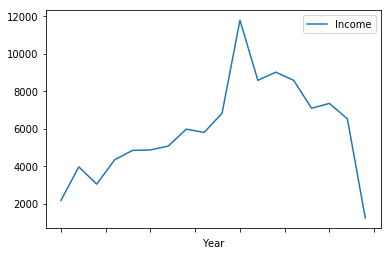

In [213]:
df.plot(x='Year',y='Income')